<a href="https://colab.research.google.com/github/RamadhanAyieko96/RAYIEKO/blob/main/Text_Sentiment_Analysis_using_an_RNN_with_LSTM_(Long_Short_Term_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**Text Sentiment Analysis using an RNN with LSTM (Long Short-Term Memory



1. RAMADHAN AYIEKO OUMA- IN14/00025/18
2. SIMON KAMAU - IN14/00003/21
3. STEPHEN MUGO -IN14/00070/20
4. FESTUS MWENDWA -IN14/00013/21   




In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# Sample dataset: Famous Quotes
data = """
    The only limit to our realization of tomorrow is our doubts of today.
    Do what you can, with what you have, where you are.
    The best way to predict the future is to create it.
    In the middle of every difficulty lies opportunity.
    Life is 10% what happens to us and 90% how we react to it.
    """

In [ ]:
# Tokenization
corpus = data.lower().split("\n")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [ ]:
# Create input sequences
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
# Pad sequences
max_seq_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_length, padding='pre')


In [ ]:
# Features and labels
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = keras.utils.to_categorical(y, num_classes=total_words)

In [ ]:
# Define RNN Model with LSTM
model = Sequential([
    Embedding(input_dim=total_words, output_dim=64, input_length=max_seq_length-1),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(total_words, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train Model
epochs = 50
history = model.fit(X, y, epochs=epochs, verbose=1)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.0128 - loss: 3.7136  
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0697 - loss: 3.7100
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0361 - loss: 3.7053
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.0489 - loss: 3.7002
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0361 - loss: 3.6943
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0489 - loss: 3.6810
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0593 - loss: 3.6568
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0849 - loss: 3.6401
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0593 - loss: 3.6061
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.0617 - loss: 3.5960
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.0617 - loss: 3.6163
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.1314 - loss: 3.5166

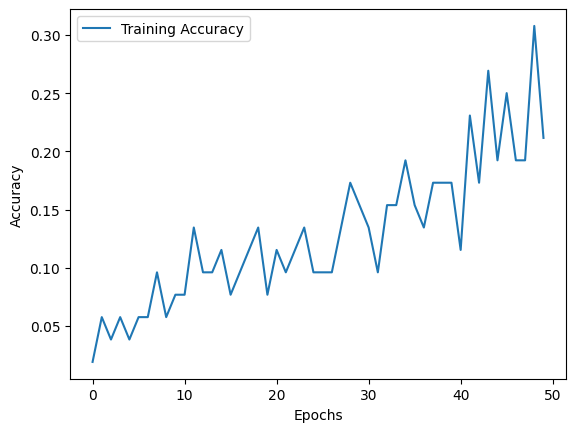

In [ ]:
# Plot Training Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)

        output_word = None  # Initialize output_word to ensure it doesn't return None
        for word, index in tokenizer.word_index.items():
            if index == predicted[0]:  # Ensure correct indexing
                output_word = word
                break

        if output_word is None:  # If no word is found, break to avoid errors
            break

        seed_text += " " + output_word
    return seed_text


In [ ]:
# Generate text sample
print("Generated Text:")
print(generate_text("The best way", next_words=1))

Generated Text:
The best way to
